# SIMPLE REGRESSION MODEL IMPLEMENTATION USING SCIKIT-LEARN

**INSTALING LIBRARIES**

In [1]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['numpy'])
await piplite.install(['scikit-learn'])

**Import needed packages**

In [2]:
import matplotlib.pyplot as plt
import pylab
import pandas as pd
import numpy as np
%matplotlib inline

**Download Data**

In [3]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [4]:
from pyodide.http import pyfetch

async def download(url, filename):
    resp = await pyfetch(url)
    if resp.status == 200:
        with open(filename, "wb") as f:
            f.write(await resp.bytes())

In [5]:
await download(path, "FuelConsumption.csv")
path="FuelConsumption.csv"

In [6]:
df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**Data Exporation**

In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
subdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
subdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


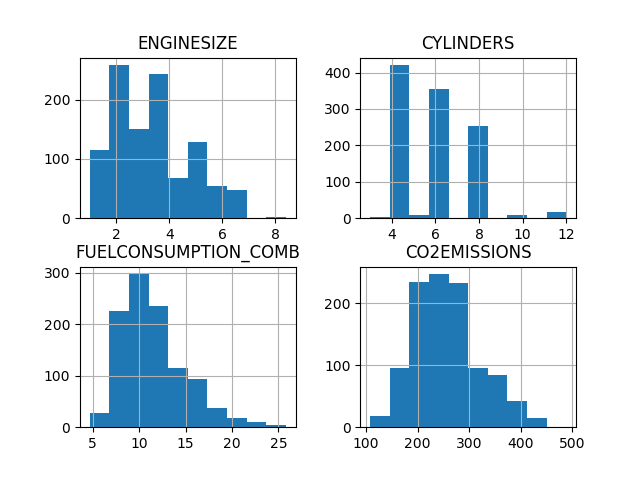

<Figure size 640x480 with 0 Axes>

In [9]:
subdf.hist()
plt.show()

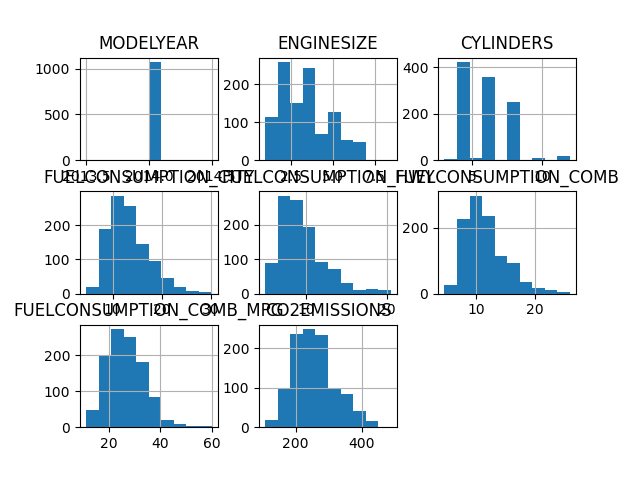

<Figure size 640x480 with 0 Axes>

In [10]:
df.hist()
plt.show()

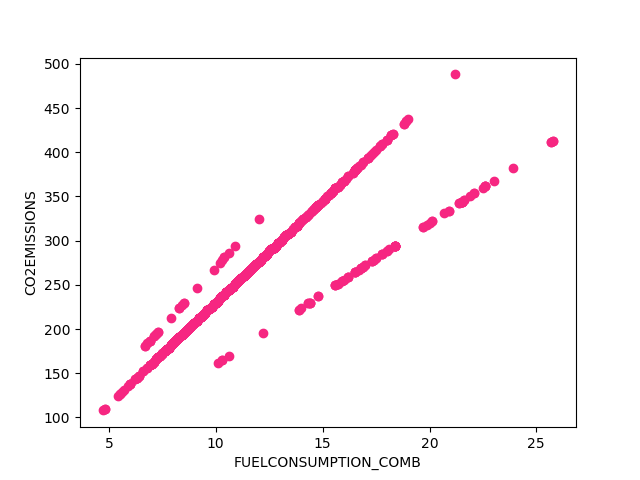

<Figure size 640x480 with 0 Axes>

In [11]:
plt.scatter(subdf.FUELCONSUMPTION_COMB, subdf.CO2EMISSIONS,  color='#f62681')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

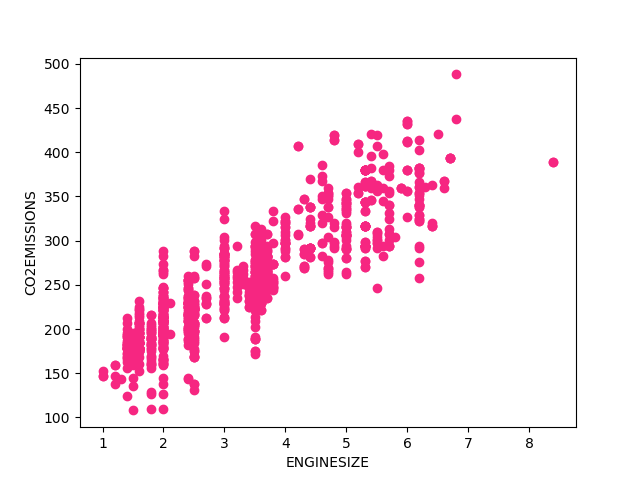

<Figure size 640x480 with 0 Axes>

In [12]:
plt.scatter(subdf.ENGINESIZE, subdf.CO2EMISSIONS,  color='#f62681')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

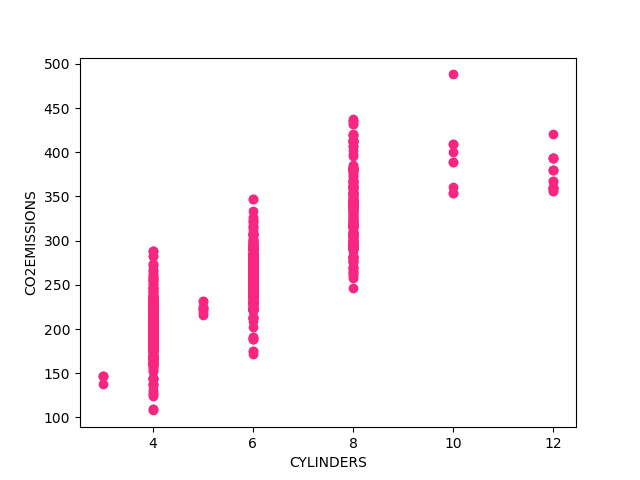

<Figure size 640x480 with 0 Axes>

In [13]:
plt.scatter(subdf.CYLINDERS, subdf.CO2EMISSIONS,  color='#f62681')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

Modeling a Linear Regression 

In [16]:
msk = np.random.rand(len(df)) < 0.8
train = subdf[msk]
test = subdf[~msk]

In [18]:
from sklearn import linear_model
lnr_reg_mdl = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
lnr_reg_mdl.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', lnr_reg_mdl.coef_)
print ('Intercept: ',lnr_reg_mdl.intercept_)

Coefficients:  [[39.43137873]]
Intercept:  [124.48841643]


Text(0, 0.5, 'Emission')

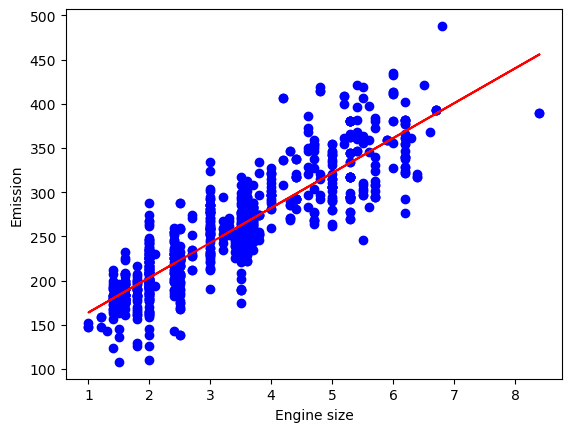

In [19]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, lnr_reg_mdl.coef_[0][0]*train_x + lnr_reg_mdl.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")